In [172]:
import networkx as nx
import matplotlib.pyplot as plt

In [83]:
my_graph = nx.Graph()
my_graph.add_node(1)
my_graph.add_nodes_from([2, 3])
my_graph.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(my_graph)


Graph with 5 nodes and 0 edges


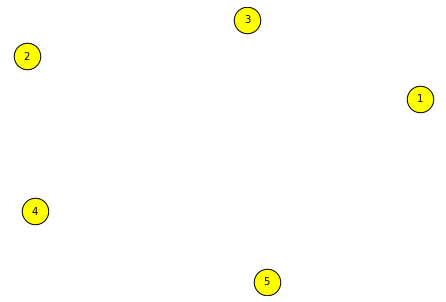

In [88]:
draw_options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "yellow",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
    "with_labels": True
}
nx.draw(my_graph, **draw_options)

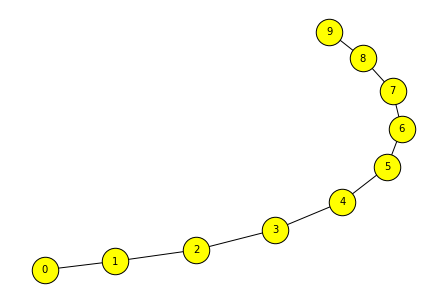

In [89]:
graph_other = nx.path_graph(10)
nx.draw(graph_other,  **draw_options)


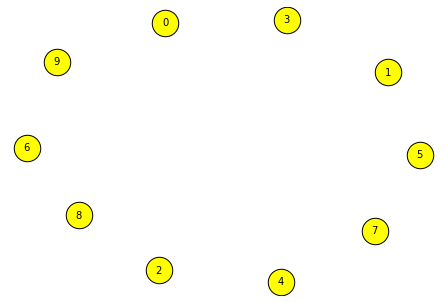

In [90]:
my_graph.add_nodes_from(graph_other)
nx.draw(my_graph,  **draw_options)

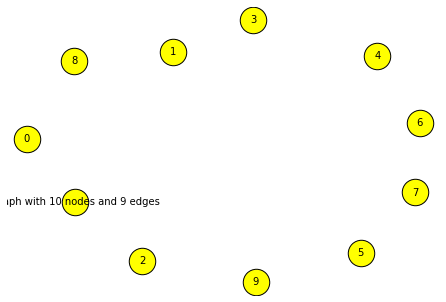

In [91]:
my_graph.add_node(graph_other)
nx.draw(my_graph,  **draw_options)

[(1, 2), (1, 3), (2, 3)]


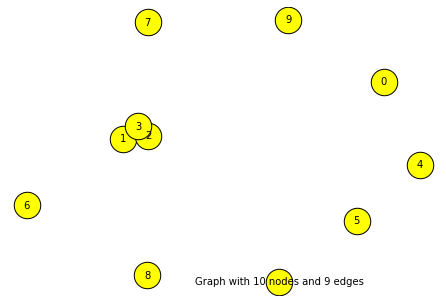

In [92]:
my_graph.add_edge(1, 2)
e = (2, 3)
my_graph.add_edge(*e)

my_graph.add_edges_from([(1, 2), (1, 3),(2, 3, {'weight': 3.1415})])
print(list(my_graph.edges))
nx.draw(my_graph,  **draw_options)

In [93]:
my_graph.clear()

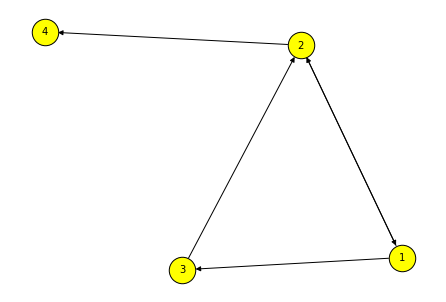

In [94]:
G = nx.DiGraph()
G.add_edge(2, 1)   # adds the nodes in order 2, 1
G.add_edge(1, 3)
G.add_edge(2, 4)
G.add_edge(1, 2)
G.add_edge(3,2)
nx.draw(G,  **draw_options)


In [95]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.neighbors(1))) 
print(G.out_degree[1])  # the number of edges exiting 1
print(G.in_degree[1])  # the number of edges entering 1
print(G.degree[1])  # the number of edges incident to 1

[2, 1, 3, 4]
[(2, 1), (2, 4), (1, 3), (1, 2), (3, 2)]
[3, 2]
2
1
3


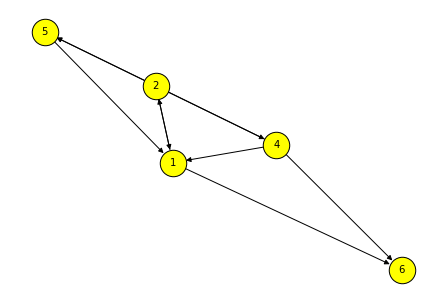

In [96]:

G.add_edge(4,1)
G.add_edge(4,5)
G.add_edge(5,1)
G.add_edge(2,5)
G.add_edge(6,5)
G.add_edge(1,6)
G.add_edge(3,5)
G.add_edge(4,6)
G.remove_node(3)
G.remove_nodes_from('4')
G.remove_nodes_from('5')
G.remove_edge(6, 5)
nx.draw(G,  **draw_options)


In [97]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G.add_edge(1, 3)
G[1][3]['color']= 'green'
print(G[1])  # same as G.adj[1]
print(G[1][2])
print(G[1][2]['color'])
print(G[1][3]['color'])

{2: {'color': 'yellow'}, 3: {'color': 'green'}}
{'color': 'yellow'}
yellow
green


In [98]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print("All edges with weight < 0.5:")
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")
print()
print("All unique edges with weight < 0.5:")
for (u, v, wt) in FG.edges.data('weight', default=0.0):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

All edges with weight < 0.5:
(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)

All unique edges with weight < 0.5:
(1, 2, 0.125)
(3, 4, 0.375)


## Generate random graph

G graph:
node1 = 9, node2 = 8 , weight = 0.644
node1 = 9, node2 = 6 , weight = 0.285
node1 = 9, node2 = 1 , weight = 0.253
node1 = 9, node2 = 0 , weight = 0.215
node1 = 8, node2 = 6 , weight = 0.138
node1 = 4, node2 = 1 , weight = 0.656
node1 = 4, node2 = 3 , weight = 0.232
node1 = 5, node2 = 7 , weight = 0.0149


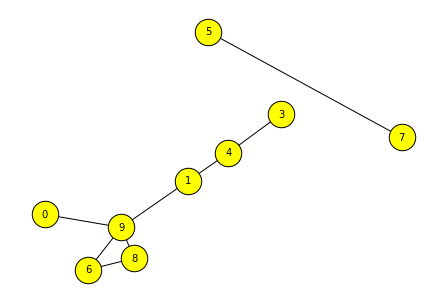

In [110]:
import numpy as np

def generate_random_graph(num_of_edges = 8, num_of_vertices = 10):
    G = nx.Graph()
    random_vertex = lambda: np.random.randint(0,num_of_vertices)
    for i in range(num_of_edges):
        u = random_vertex()
        while True:
            v = random_vertex()
            if v != u: break
        G.add_edge(u,v, weight=np.random.random())
    return G

def print_graph(G):
    for u,v,attr in G.edges.data('weight'):
        print(f'node1 = {u}, node2 = {v} , weight = {attr:.3}')

G = generate_random_graph()
print("G graph:")
print_graph(G)
nx.draw(G,  **draw_options)



H graph:
node1 = 4, node2 = 5 , weight = 0.99
node1 = 4, node2 = 9 , weight = 0.972
node1 = 5, node2 = 9 , weight = 0.184
node1 = 5, node2 = 1 , weight = 0.808
node1 = 8, node2 = 2 , weight = 0.938
node1 = 2, node2 = 3 , weight = 0.804


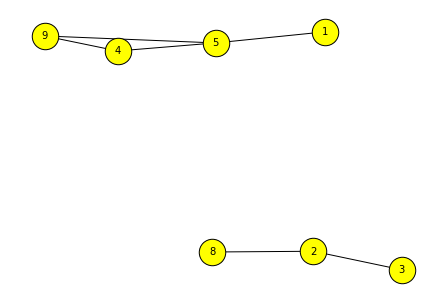

In [111]:
H = generate_random_graph()
print("\nH graph:")
print_graph(H)
nx.draw(H,  **draw_options)

node1 = 9, node2 = 8 , weight = 0.644
node1 = 9, node2 = 6 , weight = 0.285
node1 = 9, node2 = 1 , weight = 0.253
node1 = 9, node2 = 0 , weight = 0.215
node1 = 9, node2 = 4 , weight = 0.972
node1 = 9, node2 = 5 , weight = 0.184
node1 = 8, node2 = 6 , weight = 0.138
node1 = 8, node2 = 2 , weight = 0.938
node1 = 4, node2 = 1 , weight = 0.656
node1 = 4, node2 = 3 , weight = 0.232
node1 = 4, node2 = 5 , weight = 0.99
node1 = 1, node2 = 5 , weight = 0.808
node1 = 3, node2 = 2 , weight = 0.804
node1 = 5, node2 = 7 , weight = 0.0149


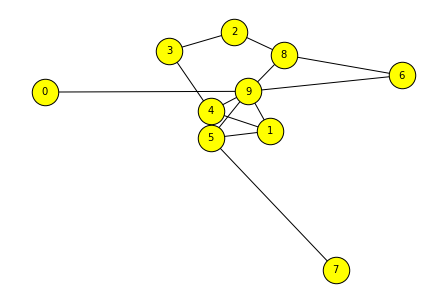

In [119]:
'''
compose(G, H)
    Returns a new graph of G composed with H.
    
    Composition is the simple union of the node sets and edge sets.
    The node sets of G and H do not need to be disjoint.
    
    Parameters
    ----------
    G, H : graph
       A NetworkX graph
    
    Returns
    -------
    C: A new graph  with the same type as G
'''
G_compose = nx.compose(G,H)
print_graph(G_compose)
nx.draw(G_compose,  **draw_options)

node1 = G-9, node2 = G-8 , weight = 0.644
node1 = G-9, node2 = G-6 , weight = 0.285
node1 = G-9, node2 = G-1 , weight = 0.253
node1 = G-9, node2 = G-0 , weight = 0.215
node1 = G-8, node2 = G-6 , weight = 0.138
node1 = G-4, node2 = G-1 , weight = 0.656
node1 = G-4, node2 = G-3 , weight = 0.232
node1 = G-5, node2 = G-7 , weight = 0.0149
node1 = H-4, node2 = H-5 , weight = 0.99
node1 = H-4, node2 = H-9 , weight = 0.972
node1 = H-5, node2 = H-9 , weight = 0.184
node1 = H-5, node2 = H-1 , weight = 0.808
node1 = H-8, node2 = H-2 , weight = 0.938
node1 = H-2, node2 = H-3 , weight = 0.804


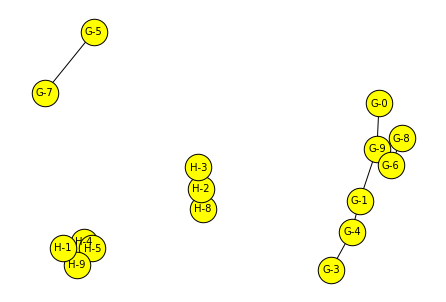

In [120]:
G_union = nx.union(G,H,rename=("G-","H-"))
print_graph(G_union)
nx.draw(G_union,  **draw_options)

node1 = 4, node2 = 1 , weight = 0.656
node1 = 4, node2 = 3 , weight = 0.232


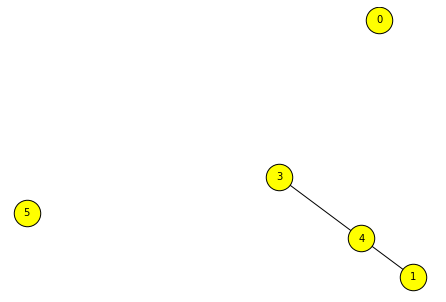

In [126]:
'''
subgraph(G, nbunch)
    Returns the subgraph induced on nodes in nbunch.
'''
G_sub = nx.subgraph(G,list(range(6)))
print_graph(G_sub)
nx.draw(G_sub,  **draw_options)

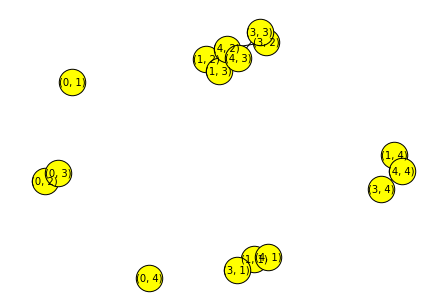

In [122]:
'''
cartesian_product(G, H)
    Returns the Cartesian product of G and H.
    
    The Cartesian product $P$ of the graphs $G$ and $H$ has a node set that
    is the Cartesian product of the node sets, $V(P)=V(G) \times V(H)$.
    $P$ has an edge $((u,v),(x,y))$ if and only if either $u$ is equal to $x$
    and both $v$ and $y$ are adjacent in $H$ or if $v$ is equal to $y$ and
    both $u$ and $x$ are adjacent in $G$.

    P: NetworkX graph
     The Cartesian product of G and H. P will be a multi-graph if either G
     or H is a multi-graph. Will be a directed if G and H are directed,
     and undirected if G and H are undirected.    
'''
G_cartesian = nx.cartesian_product(nx.subgraph(G,range(5)), nx.subgraph(H,range(5)))
nx.draw(G_cartesian,  **draw_options)

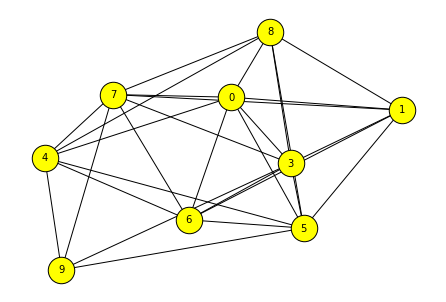

In [124]:
GC = nx.complement(G)  # every non-edge becomes an edge and vice-versa
nx.draw(GC,  **draw_options)

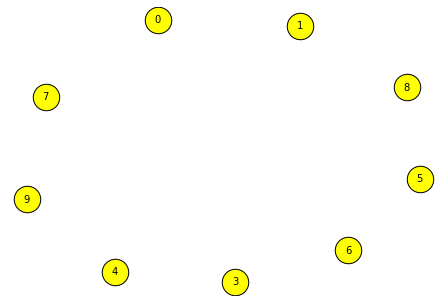

In [125]:
'''
create_empty_copy(G, with_data=True)
    Returns a copy of the graph G with all of the edges removed.    
'''
G_empty = nx.create_empty_copy(G)
nx.draw(G_empty,  **draw_options)

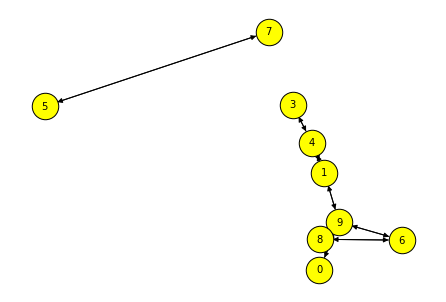

In [136]:
'''
to_directed(graph)
    Returns a directed view of the graph `graph`.
'''
# frozen directed graph
G_directed = nx.to_directed(G)
# just a directed graph
G_directed = G.to_directed(as_view = False)
nx.draw(G_directed,  **draw_options)


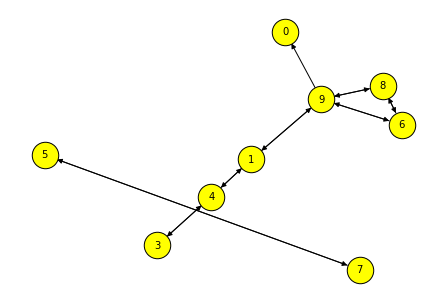

In [137]:
G_directed.remove_edge(0,9)
nx.draw(G_directed,  **draw_options)

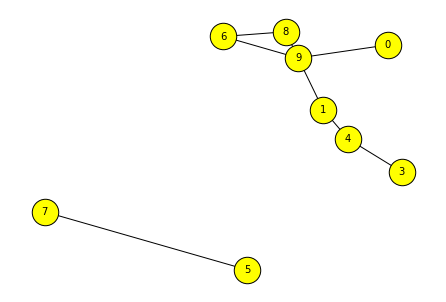

In [138]:
'''
to_undirected(graph)
    Returns an undirected view of the graph `graph`.
'''
# the first edge was returned
G_undirected = nx.to_undirected(G_directed)
nx.draw(G_undirected,  **draw_options)

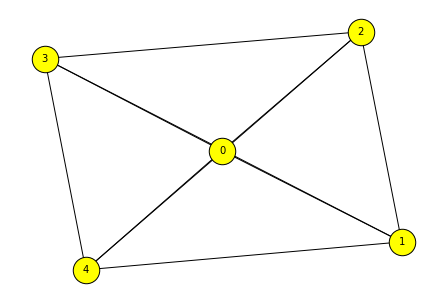

In [139]:
K_5 = nx.complete_graph(5)                  # Returns the complete graph K_n with n nodes.
nx.draw(K_5,  **draw_options)

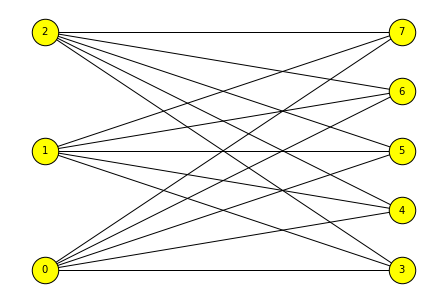

In [151]:

K_3_5 = nx.complete_bipartite_graph(3, 5)   # Returns the complete bipartite graph K_{n_1,n_2}.
nx.draw(K_3_5,  **draw_options, pos=nx.bipartite_layout(K_3_5, nx.bipartite.sets(K_3_5)[0]))

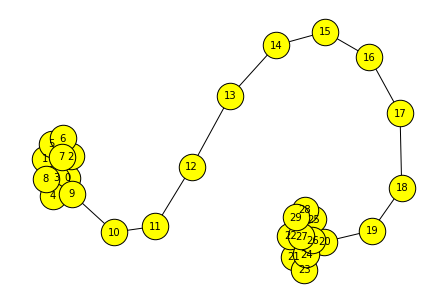

In [152]:

barbell = nx.barbell_graph(10, 10)          # Returns the Barbell Graph: two complete graphs connected by a path.
nx.draw(barbell,  **draw_options)

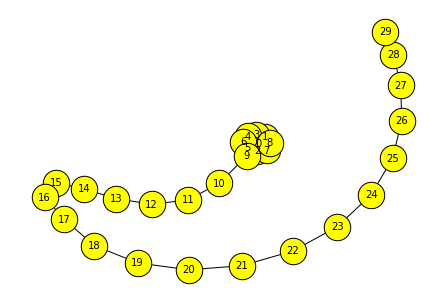

In [153]:

lollipop = nx.lollipop_graph(10, 20)        # Returns the Lollipop Graph; K_m connected to P_n.
nx.draw(lollipop,  **draw_options)

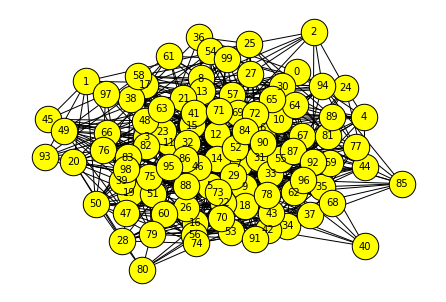

In [154]:
er = nx.erdos_renyi_graph(100, 0.15)        # Returns a G[n,p] random graph, also known as an Erdős-Rényi graph or a binomial graph.
nx.draw(er,  **draw_options)

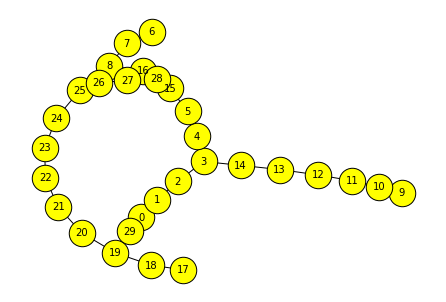

In [158]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)    # Returns a Watts–Strogatz small-world graph.
nx.draw(ws,  **draw_options)

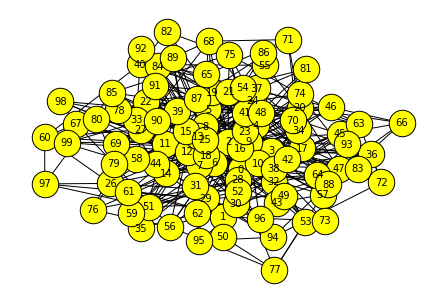

In [159]:
ba = nx.barabasi_albert_graph(100, 5)       # Returns a random graph according to the Barabási–Albert preferential attachment model.
nx.draw(ba,  **draw_options)

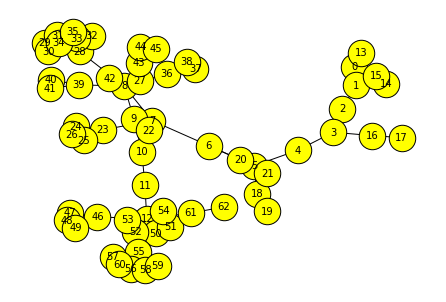

In [163]:
red = nx.random_lobster(10, 0.5, 0.5)      # Returns a random lobster graph.
nx.draw(red,  **draw_options)

## Advanced drawing

In [175]:
def generate_a_random_graph( size = 10 ,random_weight =True,weight=1,threshold = 0.5,**kwargs):
    rand = lambda:np.random.random()
    graph = nx.Graph(**kwargs)
    for v in range(size):
        for u in range(size):
            random_val = rand()
            edge_weight = random_val if random_weight else weight
            if random_val > threshold and v!=u:
                graph.add_edge(u,v,weight = round(edge_weight,3))
    return graph

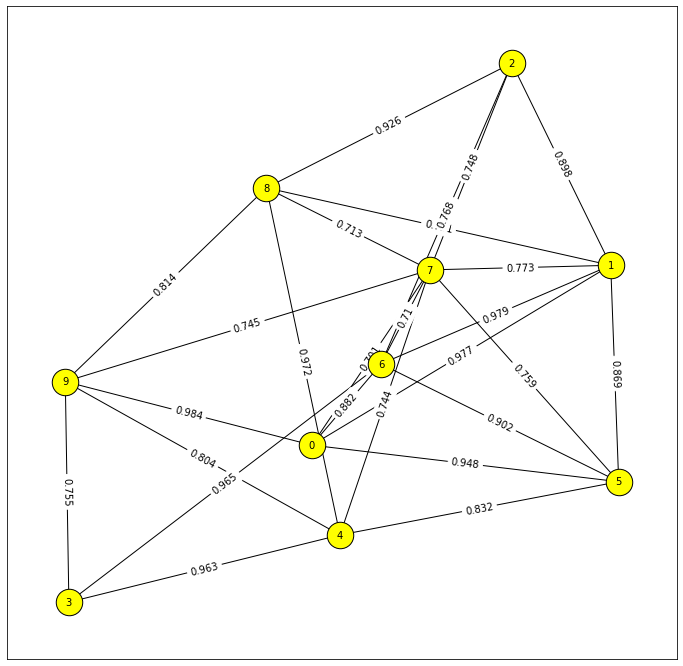

In [177]:

source = 0
size = 10
G = generate_a_random_graph(size = size ,threshold = 0.7) 
plt.figure(3,figsize=(12,12))
pos=nx.spring_layout(G)
nx.draw_networkx(G, **draw_options, pos=pos );
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);


## Graph algorithms

In [179]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# shortest paths and path lengths between nodes in the graph.
# These algorithms work with undirected and directed graphs
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
target = size -1
print('~~~shortest path~~~')
print(nx.shortest_path(G)) # returns dictionary of shortest paths
print(nx.has_path(G, source, target)) # boolean


~~~shortest path~~~
{7: {7: [7], 0: [7, 0], 6: [7, 6], 1: [7, 1], 2: [7, 2], 4: [7, 4], 5: [7, 5], 8: [7, 8], 9: [7, 9], 3: [7, 6, 3]}, 0: {0: [0], 7: [0, 7], 9: [0, 9], 1: [0, 1], 5: [0, 5], 6: [0, 6], 2: [0, 7, 2], 4: [0, 7, 4], 8: [0, 7, 8], 3: [0, 9, 3]}, 9: {9: [9], 0: [9, 0], 3: [9, 3], 7: [9, 7], 8: [9, 8], 4: [9, 4], 1: [9, 0, 1], 5: [9, 0, 5], 6: [9, 0, 6], 2: [9, 7, 2]}, 1: {1: [1], 0: [1, 0], 2: [1, 2], 5: [1, 5], 6: [1, 6], 7: [1, 7], 8: [1, 8], 9: [1, 0, 9], 4: [1, 5, 4], 3: [1, 6, 3]}, 2: {2: [2], 1: [2, 1], 8: [2, 8], 6: [2, 6], 7: [2, 7], 0: [2, 1, 0], 5: [2, 1, 5], 4: [2, 8, 4], 9: [2, 8, 9], 3: [2, 6, 3]}, 8: {8: [8], 2: [8, 2], 7: [8, 7], 1: [8, 1], 4: [8, 4], 9: [8, 9], 6: [8, 2, 6], 0: [8, 7, 0], 5: [8, 7, 5], 3: [8, 4, 3]}, 4: {4: [4], 3: [4, 3], 5: [4, 5], 7: [4, 7], 8: [4, 8], 9: [4, 9], 6: [4, 3, 6], 0: [4, 5, 0], 1: [4, 5, 1], 2: [4, 7, 2]}, 3: {3: [3], 4: [3, 4], 6: [3, 6], 9: [3, 9], 5: [3, 4, 5], 7: [3, 4, 7], 8: [3, 4, 8], 0: [3, 6, 0], 1: [3, 6, 1], 2: [3

In [180]:

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Shortest path algorithms for weighted graphs.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
print('\n~~~weighted graph~~~')
#dijkstra
print(nx.dijkstra_predecessor_and_distance(G, source)) # returns dictionary of shortest path 
print(nx.dijkstra_path(G, source, target ))  # returns list
# Floyd Warshall
print(nx.floyd_warshall_numpy(G)) # returns a numpay array



~~~weighted graph~~~
({0: [], 7: [0], 9: [0], 1: [0], 5: [0], 6: [0], 2: [7], 4: [7], 8: [7], 3: [9]}, {0: 0, 7: 0.701, 6: 0.882, 5: 0.948, 1: 0.977, 9: 0.984, 8: 1.414, 4: 1.4449999999999998, 2: 1.4489999999999998, 3: 1.7389999999999999})
[0, 9]
[[0.    0.701 0.745 0.773 0.748 0.713 0.744 1.5   0.71  0.759]
 [0.701 0.    0.984 0.977 1.449 1.414 1.445 1.739 0.882 0.948]
 [0.745 0.984 0.    1.518 1.493 0.814 0.804 0.755 1.455 1.504]
 [0.773 0.977 1.518 0.    0.898 0.731 1.517 1.944 0.979 0.869]
 [0.748 1.449 1.493 0.898 0.    0.926 1.492 1.733 0.768 1.507]
 [0.713 1.414 0.814 0.731 0.926 0.    0.972 1.569 1.423 1.472]
 [0.744 1.445 0.804 1.517 1.492 0.972 0.    0.963 1.454 0.832]
 [1.5   1.739 0.755 1.944 1.733 1.569 0.963 0.    0.965 1.795]
 [0.71  0.882 1.455 0.979 0.768 1.423 1.454 0.965 0.    0.902]
 [0.759 0.948 1.504 0.869 1.507 1.472 0.832 1.795 0.902 0.   ]]


{(3, 4), (0, 9), (5, 7), (8, 2), (1, 6)}


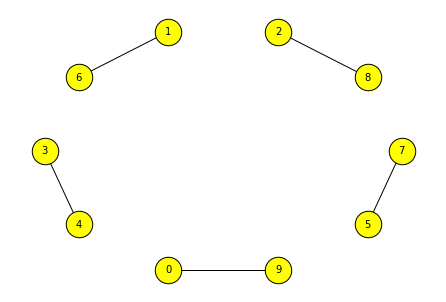

In [185]:
max_weight_matching = nx.max_weight_matching(G)
print(max_weight_matching)
nx.draw_shell(nx.Graph(max_weight_matching) , **draw_options)

[(0, 9), (9, 3), (3, 4), (4, 5), (5, 0)]


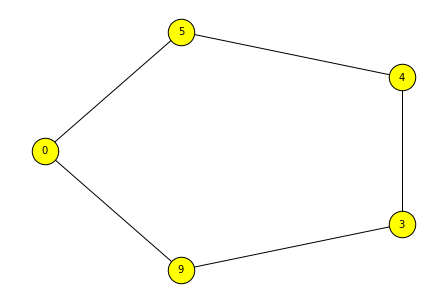

In [186]:
cycle = nx.find_cycle(G)
print(cycle)
nx.draw_shell(nx.Graph(cycle), **draw_options)